In [1]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (21.9 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [2]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
contents_pd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DX_contents/kr_dx_concat_pre.csv', encoding='utf-8')
contents_pd.columns =['id', 'title', 'url', 'date', 'keyword', 'creator', 'view','likes', 'depart', 'depart1', 'language', 'text', 'new_text','key_words']

In [4]:
contents_pd['depart'].unique()

array(['DX이해', 'DX태도', '워크스킬', '데이터기술', '지능화기술', '자동화기술', '컴퓨팅기술',
       '최신기술활용역량', '커뮤니케이션'], dtype=object)

In [96]:
df1=contents_pd[contents_pd['depart']=='데이터기술']

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer( stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(df1['key_words'])

In [98]:
from sklearn.cluster import KMeans

# n개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# 소속 클러스터를 cluster_label 컬럼
df1['cluster_label'] = cluster_label
df1.sort_values(by='cluster_label')

,id,title,url,date,keyword,creator,view,likes,depart,depart1,language,text,new_text,key_words,cluster_label
273,273,MRO 구매가 어려워?? DB관리부터 시작해! (서브원에는 전문조직까지?),https://www.youtube.com/watch?v=P7VLuJm5nCY&pp...,2022.8.4,#DB,서브원 채널,17589,17.0,데이터기술,DB설계,한국어,"#MRO #구매 전문가 #서브원이 알려주는 ✨MRO 클래쓰✨\nMRO구매, 어떤 것...",MRO 구매가 어려워 DB관리부터 시작해 서브원에는 전문조직까지 MRO 구매 전문가...,"MRO, 구매 전문가, DB 표준화, 상품 DB 관리, 서비스, 공식 홈페이지, 디...",0
263,263,"관계형 DB에서, 스키마를 설계하는 법! 5분 순삭 | 디모의 5분 코딩상식",https://www.youtube.com/watch?v=HsGaPadXJXQ&pp...,2020.3.19,#기초,테크과학! DiMo,15975,NaN,데이터기술,데이터분석사례,한국어,관계형 DB의 구조와 제약조건을 설계하는 스키마(Schema)\n복잡해 보이는 관계...,관계형 DB에서 스키마를 설계하는 법 5분 순삭 디모의 5분 코딩상식 관계형 DB...,"관계형 데이터베이스, 스키마, SQL, 데이터베이스, 디지털 혁신",0
264,264,DB 테이블 설계 잘못하면 어떤 문제가 생길 수 있을까요?,https://www.youtube.com/watch?v=JwfQ8ouhAzA&pp...,2022.10.12,백발백중 시리즈,쉬운코드,5666,213.0,데이터기술,DB설계,한국어,#설계 #table #database #쉬운코드 \n\n데이터베이스느 백엔드에서 매...,DB 테이블 설계 잘못하면 어떤 문제가 생길 수 있을까요 설계 table datab...,"데이터베이스, 백엔드, DB 스키마, 테이블 설계, 구조 변경, 문제,...",0
266,266,데이터베이스 08. 데이터베이스 설계 및 구축,https://www.youtube.com/watch?v=vLAhZFDHzio&pp...,2020.9.14,2020 데이터베이스,Jacob's Lecture,6462,62.0,데이터기술,DB설계,한국어,정보시스템 구축 절차\nERD의 3요소 중 엔티티와 속성,데이터베이스 08 데이터베이스 설계 및 구축 정보시스템 구축 절차\nERD의 3요소...,"데이터베이스, 데이터베이스 설계, 정보시스템, 엔티티, 속성, ERD.",0
268,268,백엔드 개발자라면 반드시 알아야하는 ERD로 관계형 데이터베이스 설계해보기 | 개발...,https://www.youtube.com/watch?v=jsOPr3QfMW0&pp...,2022.12.21,NaN,헬로카일,9917,269.0,데이터기술,DB설계,한국어,이번 영상에서는 백엔드 개발자라면 반드시 알아야하는 ERD다이아그램 설계하는 방법에...,백엔드 개발자라면 반드시 알아야하는 ERD로 관계형 데이터베이스 설계해보기 개발자...,"ERD, 관계형 데이터베이스 설계, MySQL, 프로젝트, 디자인 파일, 툴, 백엔...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,"비싼 Greenhouse, Workable 대신, 무료 지원자 관리 시스템 (ATS...",https://www.youtube.com/watch?v=Lav_5X9OK0c,2021.4.6,NaN,일잘러 장피엠,3733,86.0,데이터기술,DB관리,한국어,• 노코드 지원자 관리 시스템 템플릿 복사 : https://abit.ly/noco...,비싼 Greenhouse Workable 대신 무료 지원자 관리 시스템 ATS Ai...,"지원자 관리 시스템, 노코드, Airtable, 무료, 채용, 지원자 데이터 분석,...",2
283,283,[30초사용법] Bigquery 피봇 테이블 사용하기,https://www.youtube.com/watch?v=rEOYaVanyew&pp...,2021.6.5,Google(구글) Workpalce(G Suite) 사용법 도움말,조코디의 구글 스마트워크 세상,121,1.0,데이터기술,DB관리,한국어,"Bigquery 피봇 테이블 사용하는 방법입니다.\n\n""30초 사용법 모음 → h...",30초사용법 Bigquery 피봇 테이블 사용하기 Bigquery 피봇 테이블 사용...,"BigQuery, 클라우드 서비스, 구글 워크스페이스, 데이터 분석, 데...",2
284,284,BigQuery 시작하기 1강 - Introduction | T아카데미,https://www.youtube.com/watch?v=MILy4dzSGk4&pp...,2022.7.21,BigQuery 시작하기,SKplanet Tacademy,3842,52.0,데이터기술,DB관리,한국어,BigQuery의 다양한 기능을 소개하고 BigQuery를 활용한 데이터 분석 방법...,BigQuery 시작하기 1강 Introduction T아카데미 BigQuery...,"BigQuery, 데이터 분석, T아카데미, 도구, 기능, 활용",2
257,257,KNIME을 활용한 중고차 예측모델,https://www.youtube.com/watch?v=lW7YQDrS8B0&pp...,2022.12.10,#가천대,HJ,21,1.0,데이터기술,데이터분석,한국어,"안녕하세요, 2022년도 GA 수업을 수강한 가천대학교 약학대학 18학번 조현지입니...",KNIME을 활용한 중고차 예측모델 안녕하세요 2022년도 GA 수업을 수강한 가천...,"KNIME, 머신러닝, 중고차, 예측모델, 데이터 분석, 데이터 모델링.",2


In [99]:
def generate_word_cloud(dataframe, column):
    # Combine all text into a single string
    text = "\n".join(dataframe[column])

    # Function for replacing special characters and consecutive whitespaces
    def fun_replacement(text):
        # Special character replacement
        tmp = re.sub(re.compile("\(|\)|,|\+|-|/|=|\*|\'|\"|\n|\.", re.DOTALL), " ", text)
        # Remove consecutive whitespaces
        tmp = re.sub(re.compile("[ ]{1,}", re.DOTALL), " ", tmp)
        return tmp

    # Replace special characters and split the text into a list of words
    text_lst = fun_replacement(text).split()

    # Count the occurrence of each word
    word_counts = {}
    for word in text_lst:
        if word not in word_counts:
            word_counts[word] = 0
        word_counts[word] += 1

    # Filter words based on count
    word_counts_filtered = {}
    for word, count in word_counts.items():
        if 3 < count < 100:
            word_counts_filtered[word] = count

    # Generate word cloud
    font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"  # Nanum font path
    stopword = ['디지털', 'DX']
    wc = WordCloud(max_font_size=200, stopwords=stopword, font_path=font_path, background_color='white',
                   width=1000, height=1000).generate_from_frequencies(word_counts_filtered)

    # Display word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()

    # Topic modeling
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(dataframe[column])
    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
    lda_top = lda_model.fit_transform(X)
    terms = vectorizer.get_feature_names_out()

    def get_topics(components, feature_names, n=5):
        for idx, topic in enumerate(components):
            print("Topic %d:" % (idx + 1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

    get_topics(lda_model.components_, terms)


---

In [100]:
#그룹1
filtered_df = df1[df1['cluster_label'] == 0]
filtered_df[['title', 'key_words', 'cluster_label']]

,title,key_words,cluster_label
260,10분으로 알아보는 AI 기술의 적용 사례들 알아보기! | 십분 AI,"AI 기술, 적용 사례, 디지털 혁신",0
263,"관계형 DB에서, 스키마를 설계하는 법! 5분 순삭 | 디모의 5분 코딩상식","관계형 데이터베이스, 스키마, SQL, 데이터베이스, 디지털 혁신",0
264,DB 테이블 설계 잘못하면 어떤 문제가 생길 수 있을까요?,"데이터베이스, 백엔드, DB 스키마, 테이블 설계, 구조 변경, 문제,...",0
266,데이터베이스 08. 데이터베이스 설계 및 구축,"데이터베이스, 데이터베이스 설계, 정보시스템, 엔티티, 속성, ERD.",0
268,백엔드 개발자라면 반드시 알아야하는 ERD로 관계형 데이터베이스 설계해보기 | 개발...,"ERD, 관계형 데이터베이스 설계, MySQL, 프로젝트, 디자인 파일, 툴, 백엔...",0
269,데이터베이스 21. ERD 연습 - 교보문고,"데이터베이스, ERD, 교보문고.",0
271,"DB는 이걸로 하셈. 1시간만에 끝내는 데이터베이스 개념부터 설계, SQL까지!","데이터베이스, 강의, SQL, 인프런, 프로젝트, 풀스택, 프론트엔드...",0
272,DB(데이터 베이스)에도 종류가 있다? DB 3종 3분만에 완벽분석,"데이터베이스, DBMS, 오라클, 티베로, MySQL",0
273,MRO 구매가 어려워?? DB관리부터 시작해! (서브원에는 전문조직까지?),"MRO, 구매 전문가, DB 표준화, 상품 DB 관리, 서비스, 공식 홈페이지, 디...",0
274,"(SQL 기초) 임시 테이블 생성, DB 관리, 효율적인 데이터 관리 방법 개발자...","SQL 기초, 임시테이블, 데이터 관리, SQL Developer, 오라클 SQL,...",0


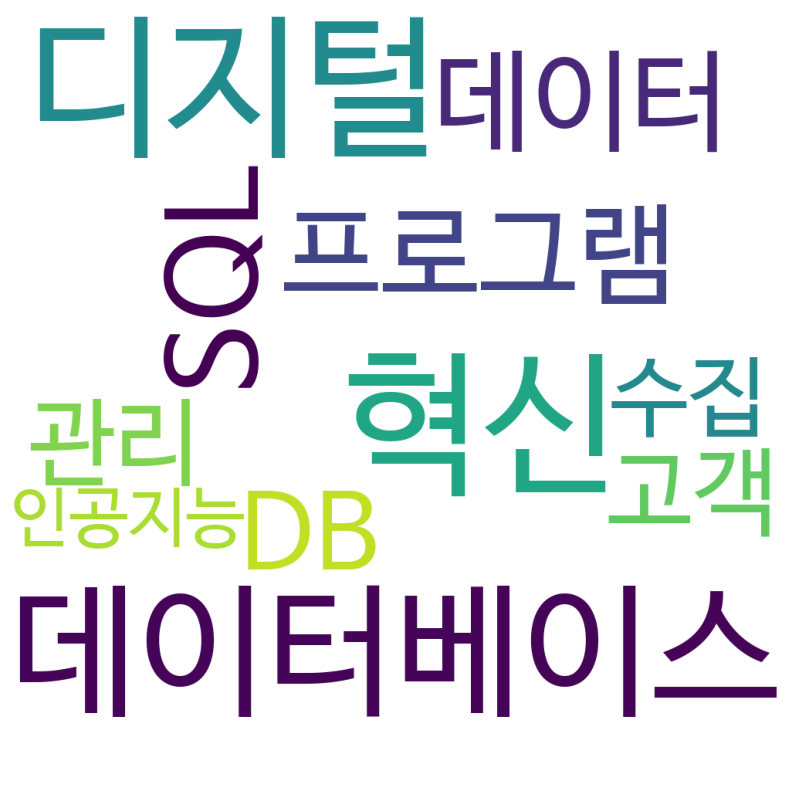

Topic 1: [('firebase', 1.13), ('db', 1.13), ('구조', 1.07), ('변경', 1.05), ('인공신경망', 1.04)]
Topic 2: [('인프런', 1.13), ('관리형태', 1.09), ('page', 1.07), ('이메일', 1.05), ('회원가입', 1.04)]
Topic 3: [('모바일', 1.2), ('프로그램', 1.1), ('erd', 1.09), ('클라우드', 1.06), ('모으기', 1.06)]
Topic 4: [('외부', 1.07), ('elastic', 1.06), ('korea', 1.02), ('인공지능', 1.02), ('혁명', 1.01)]
Topic 5: [('ai', 1.31), ('메일', 1.11), ('오라클', 1.09), ('꿀팁', 1.07), ('db', 1.06)]
Topic 6: [('교보문고', 1.07), ('디자인', 1.06), ('없이', 1.06), ('고객', 1.05), ('문법', 1.03)]
Topic 7: [('콜드콜링', 1.22), ('gcp', 1.05), ('빅쿼리', 1.02), ('클라우드', 1.02), ('구축', 0.99)]
Topic 8: [('구조', 1.1), ('기초', 1.06), ('sns', 1.05), ('솔루션', 1.02), ('잠재고객', 1.0)]
Topic 9: [('4차', 1.18), ('디지털', 1.14), ('sql', 1.13), ('db', 1.13), ('데이터베이스', 1.07)]
Topic 10: [('실무', 1.04), ('dba', 1.04), ('전파법', 1.04), ('sw교육', 1.03), ('후원사', 1.02)]


In [101]:
generate_word_cloud(filtered_df, 'key_words')

In [102]:
#그룹2
filtered_df = df1[df1['cluster_label'] == 1]
filtered_df[['title', 'key_words', 'cluster_label']]

,title,key_words,cluster_label
287,컴퓨터 프로그램 엑셀 기초 배우기 1시간만 공부하면 초보탈출~~,"엑셀, 프로그램, 기초, 교육, MS 엑셀, 액셀 프로그램 강의.",1
288,"직장인 엑셀, 수식 3개랑 이 기능 하나면 웬만한 건 다 됨(진짜로;;)","엑셀, COUNTIF 함수, 절대참조 기능, VLOOKUP 함수, SUM...",1
290,"엑셀 대시보드, 초보자를 위한 90분 총정리 가이드 - 보고서의 품격이 달라집니다!","엑셀 대시보드, 엑셀 가계부, 엑셀 강의, 엑셀 기초, 실무 엑셀, 데...",1
291,"엑셀 대시보드 만들기, 딱 ""5분""만 투자하세요! - 중요 기능 핵심 정리 | 진짜...","대시보드, 엑셀, 실무 엑셀, 교재, 멤버쉽, 라이브강의, 워크샵, ...",1
292,"일일 실적보고, 이제 손으로 타이핑하지 마세욥 (엑셀봇)","일일 실적보고, 엑셀 봇, 업무 자동화, 엑셀, TEXT 함수, 실적 업데이트, 노...",1
294,엑셀 에 꼭 필요한 50가지 필수 기능을 정말 쉽게 알려드립니다,"MS엑셀, 필수 기능, 강의, 초보자, 중급자, IT, 모바일, 기기, 사용법, 응...",1
295,"직장인 엑셀 집계함수, 15분 만에 완전정복 하기","직장인, 엑셀, 집계함수, 피벗테이블, 데이터 분석, 셀 서식, 조건부 함수, 생산...",1
296,"엑셀 함수 ""자동완성"" 기능! 드디어 공개되었습니다 | 이제 Ai가 함수도 만들어주...","엑셀, 함수 자동완성, Ai, 가성비, 최고, 빠른채우기, 텍스트 가공, 자릿수 계...",1
297,"직장인 엑셀 필수함수 VLOOKUP, 야 너두 15분 만에 뗄 수 있어! (feat...","직장인, 엑셀, VLOOKUP, INDEXMATCH, 피벗테이블, 생산성, 노션AI...",1
299,"직장인이 꼭 알아야 할 필터 자동화, 이거 알면 정말 편리합니다 | 엑셀 고급필터 매크로","엑셀, 고급 필터, 자동화, 매크로, 프로그램, 필터링, 실무, 범위 속성, 필드 ...",1


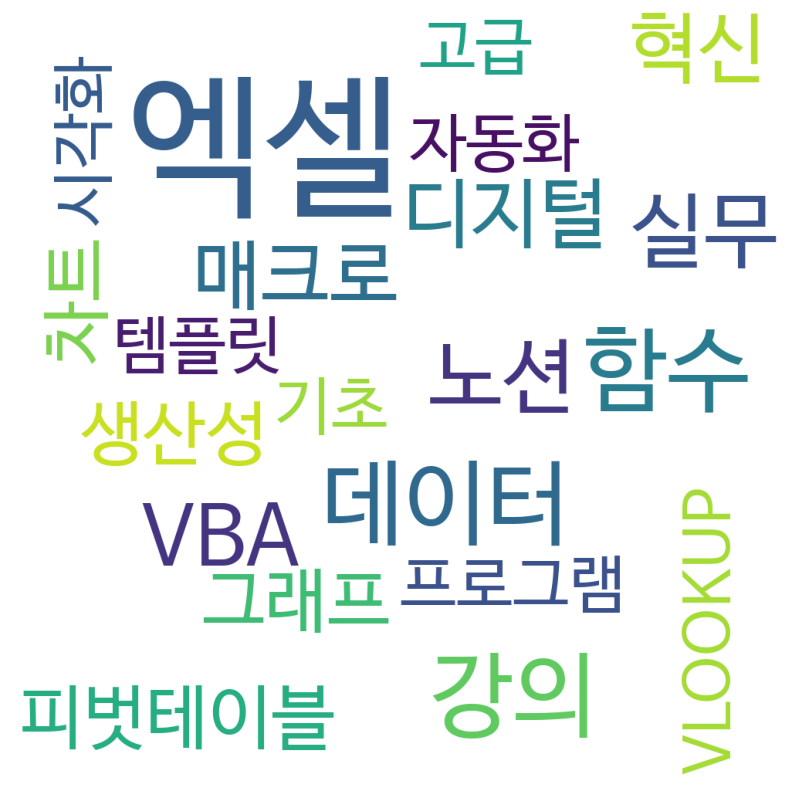

Topic 1: [('indexmatch', 1.13), ('기능', 1.06), ('프로그램', 1.05), ('조건부', 1.05), ('분석', 1.04)]
Topic 2: [('필수', 1.13), ('단축', 1.03), ('가공', 1.02), ('생산성', 1.01), ('템플릿', 1.01)]
Topic 3: [('엑셀', 1.2), ('업무', 1.2), ('차트', 1.13), ('강좌', 1.04), ('교재', 1.02)]
Topic 4: [('디지털', 1.13), ('계산', 1.09), ('가계부', 1.06), ('많을', 1.02), ('조건', 1.02)]
Topic 5: [('많을', 1.23), ('초보자', 1.17), ('ms엑셀', 1.13), ('일일', 1.07), ('시각화', 1.06)]
Topic 6: [('피벗테이블', 1.09), ('엑셀', 1.06), ('단축', 1.04), ('excel4macro', 1.02), ('커뮤니티', 1.01)]
Topic 7: [('권현욱', 1.07), ('프로그래밍', 1.03), ('adodb', 1.03), ('creative', 1.01), ('응용', 1.01)]
Topic 8: [('세로막대', 1.13), ('가계부', 1.07), ('피벗테이블', 1.03), ('그래프', 1.01), ('슬라이서', 1.01)]
Topic 9: [('chart', 1.16), ('진행', 1.15), ('db', 1.06), ('추출', 1.05), ('대시보드', 1.02)]
Topic 10: [('vlookup', 1.13), ('vba', 1.11), ('교재', 1.07), ('프로그램', 1.04), ('substitute', 1.03)]


In [103]:
generate_word_cloud(filtered_df, 'key_words')

In [104]:
#그룹3
filtered_df = df1[df1['cluster_label'] == 2]
filtered_df[['title', 'key_words', 'cluster_label']]

,title,key_words,cluster_label
242,정말 쉬운 데이터분석📈 오렌지3🍊 | full version | 무료강의,"Orange3, 머신러닝, 데이터 마이닝, 빅데이터, 데이터 분석, 코딩, Pyth...",2
243,Orange 데이터분석 - 시계열분석(ARIMA),"Orange, 데이터 분석, 시계열 분석, ARIMA, 위젯, 마우스 클릭, 마우스...",2
244,[Orange] 이미지 분석: 클러스터링(Clustering)과 분류(Classif...,"Orange, 데이터 마이닝, 클러스터링, 분류법, 이미지 데이터, 오픈 소스, 데...",2
245,"[Orange3]데이터분석,머신러닝_[3. Regression/아이오와 집값 예측하기]","Orange3, 데이터 분석, 머신 러닝, 인공지능, 집값 예측",2
246,[STEP] Orange를 활용한 정형 데이터 분석,"STEP Orange, 정형 데이터 분석, 데이터 마이닝 도구",2
247,[Excel과 Orange] Sentiment Analysis(감성 분석),"Excel, Orange, 데이터 마이닝, 감성 분석, 한국어 처리, 텍스트 분석,...",2
248,Orange3 데이터 분석(30/36) - 텍스트 분류,"Orange3, 데이터 분석, 텍스트 분류, 로지스틱 회귀, 위젯, 연결, 안데르센...",2
249,[엑셈 웨비나] 데이터 분석 플랫폼 'KNIME' (1강),"데이터 분석, KNIME, 머신러닝, 딥러닝, AI 기술, 화면 구성, 환경 설정,...",2
250,[제품 소개] 데이터 전처리 및 통합 분석 소프트웨어 KNIME(나임),"데이터 분석, 데이터 전처리, 데이터 통합, 데이터 모델링, 데이터 시각...",2
251,��영상 하나로 KNIME 사용법 완벽 정리🔥 나임을 활용한 데이터 전처리 방법 [...,"KNIME, 데이터 전처리, 워크플로우, 파일 가져오기, 컬럼 분할, 컬럼명 변경,...",2


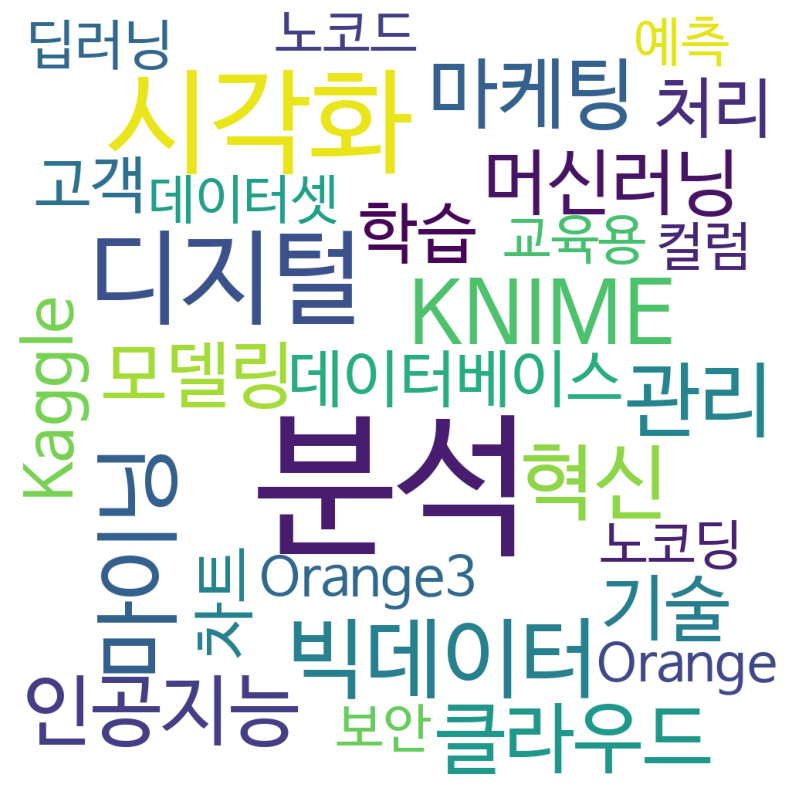

Topic 1: [('필터링', 1.13), ('클라우드', 1.1), ('knime', 1.07), ('데이터', 1.06), ('아키텍쳐', 1.06)]
Topic 2: [('그룹별', 1.17), ('시각화', 1.12), ('순서', 1.09), ('서식작성', 1.06), ('온라인', 1.06)]
Topic 3: [('python', 1.31), ('도출', 1.18), ('시각화', 1.13), ('기대수익', 1.07), ('airtable', 1.07)]
Topic 4: [('인공지능', 1.1), ('프로그래밍', 1.1), ('회귀모델', 1.09), ('지원자', 1.08), ('필터링', 1.06)]
Topic 5: [('기술', 1.2), ('분석', 1.14), ('함수', 1.07), ('서식기능', 1.07), ('차트', 1.06)]
Topic 6: [('합법적', 1.05), ('가격', 1.04), ('금전출납부', 1.04), ('역할', 1.01), ('미디어', 1.01)]
Topic 7: [('알고리즘', 1.1), ('마케팅', 1.04), ('수정', 1.03), ('서식기능', 1.03), ('입력', 1.03)]
Topic 8: [('데이터', 1.43), ('erd', 1.12), ('관리', 1.11), ('도구', 1.09), ('로지스틱', 1.06)]
Topic 9: [('서식기능', 1.07), ('기대수익', 1.05), ('kaggle', 1.04), ('중고차', 1.03), ('상업적', 1.02)]
Topic 10: [('한국어', 1.15), ('디지털', 1.15), ('합법적', 1.11), ('예측', 1.1), ('산업혁명', 1.04)]


In [105]:
generate_word_cloud(filtered_df, 'key_words')